In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from pandas import get_dammies
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from google.colab import files

ImportError: cannot import name 'get_dammies' from 'sklearn.preprocessing' (/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/__init__.py)

In [2]:
data = pd.read_csv("turnover.csv", encoding='latin1')
data

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,10.611910,0,f,41.0,Banks,HR,rabrecNErab,my head,m,white,bus,8.6,3.4,2.6,4.8,8.3
1125,10.611910,0,f,41.0,Banks,HR,rabrecNErab,my head,m,white,bus,8.6,3.4,2.6,4.8,8.3
1126,118.800821,0,f,34.0,Telecom,Accounting,KA,no,f,white,bus,4.6,5.5,7.2,6.3,3.7
1127,49.412731,0,f,51.0,Consult,HR,empjs,no,m,grey,bus,3.8,7.6,5.7,6.3,5.2




---



Удалим дубликаты и выведем все текущие названия столбцов в DataFrame

In [3]:
data.drop_duplicates(inplace=True) # операция изменяет исходный DataFrame data, а не создает новый.
print(data.columns)

Index(['stag', 'event', 'gender', 'age', 'industry', 'profession', 'traffic',
       'coach', 'head_gender', 'greywage', 'way', 'extraversion', 'independ',
       'selfcontrol', 'anxiety', 'novator'],
      dtype='object')


Размерность данных: количество строк и столбцов

In [4]:
print(data.shape)

(1116, 16)


Выведем всю необходимую информацию о датафрейме для дальнейшей работы с ней

In [5]:
print(data.info(show_counts=True, memory_usage=False, verbose=True))

<class 'pandas.core.frame.DataFrame'>
Index: 1116 entries, 0 to 1128
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          1116 non-null   float64
 1   event         1116 non-null   int64  
 2   gender        1116 non-null   object 
 3   age           1116 non-null   float64
 4   industry      1116 non-null   object 
 5   profession    1116 non-null   object 
 6   traffic       1116 non-null   object 
 7   coach         1116 non-null   object 
 8   head_gender   1116 non-null   object 
 9   greywage      1116 non-null   object 
 10  way           1116 non-null   object 
 11  extraversion  1116 non-null   float64
 12  independ      1116 non-null   float64
 13  selfcontrol   1116 non-null   float64
 14  anxiety       1116 non-null   float64
 15  novator       1116 non-null   float64
dtypes: float64(7), int64(1), object(8)None


В сводке содержится следующая информация: количество строк и столбцов;
названия и типы данных каждого столбца; количество непустых значений в каждом столбце



---



Построим ⭐ **баланс классов** ⭐ для сравнения количества событий с меткой 0 и 1 в DataFrame

(возвращает подмножество строк, где булевая серия (True/False) = True (если значение в столбце "event" равно 0 ➡ True). Shape возвращает кортеж, состоящий из двух элементов (количество строк и количество столбцов), чтобы получить только количество строк, мы обращаемся к элементу с индексом 0 с помощью [0])

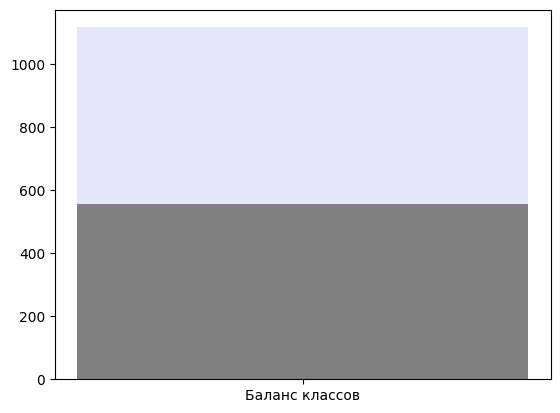

In [6]:
x = "Баланс классов"
y1 = data[data["event"]==0].shape[0]
y2 = data[data["event"]==1].shape[0]

plt.bar(x, y1, color='grey')  # столбец для y1
plt.bar(x, y2, bottom=y1, color='lavender') # столбец для y2

plt.show()

Из графика можно сделать вывод о том, что количество объектов класса 0 примерно равно количеству объектов класса 1



---



Проверим данные на наличие пропусков

Выполним очистку данных от пропущенных значений, заменяя их медианными значениями в столбцах, где пропущенных значений менее половины, и удаляя столбцы, где пропущенных значений более половины

In [7]:
if data.isnull().any().any():
  print("Eсть пропуски в следующих столбцах: ", data.columns[data.isnull().any()].tolist() ) # tolist() - преобразует выбранные названия столбцов в список
  for column in data.columns:
      if data[column].isnull().sum() > len(data) / 2:
          data.drop(column, inplace=True)
          print(f"Столбец {column} удален, так как содержит более половины пропущенных значений.")
      else:
          col_median = data[column].median() # median устойчива к выбросам, а mean нет
          data[column] = data[column].fillna(col_median)
          print(f"Все пропущенные значения столбца {column} заменены на медианное значение по этому столбцу, так как серия содержит менее половины пропущенных значений.")
else:
  print("Пропусков в данных нет :)")

Пропусков в данных нет :)




---



Поработаем с категориальными значениями...

- убедимся что они присутствуют: (если присутствуют, то преобразуем в числовые значения)

In [8]:
print(data.dtypes)

stag            float64
event             int64
gender           object
age             float64
industry         object
profession       object
traffic          object
coach            object
head_gender      object
greywage         object
way              object
extraversion    float64
independ        float64
selfcontrol     float64
anxiety         float64
novator         float64
dtype: object


Преобразуем категориальные значения столбцов **"gender", "industry", "profession", "traffic", "coach", "head_gender", "greywage" и "way"** в числовые

lbl_en = LabelEncoder()
for column in ["gender", "industry", "profession", "traffic", "coach", "head_gender", "greywage", "way"]:
    lbl_en.fit(data[column])   # обучается на уникальных значениях каждого столбца
    data[column] = lbl_en.transform(data[column])
print(data.columns)

In [58]:
get_dum = pd.get_dummies(data, columns = ["gender", "industry", "profession", "traffic", "coach", "head_gender", "greywage", "way"])
get_dum


,stag,event,age,extraversion,independ,selfcontrol,anxiety,novator,gender_0,gender_1,...,coach_0,coach_1,coach_2,head_gender_0,head_gender_1,greywage_0,greywage_1,way_0,way_1,way_2
0,7.030801,1,35.0,6.2,4.1,5.7,7.1,8.3,False,True,...,False,True,False,True,False,False,True,True,False,False
1,22.965092,1,33.0,6.2,4.1,5.7,7.1,8.3,False,True,...,False,True,False,False,True,False,True,True,False,False
2,15.934292,1,35.0,6.2,6.2,2.6,4.8,8.3,True,False,...,False,True,False,False,True,False,True,True,False,False
3,15.934292,1,35.0,5.4,7.6,4.9,2.5,6.7,True,False,...,False,True,False,False,True,False,True,True,False,False
4,8.410678,1,32.0,3.0,4.1,8.0,7.1,3.7,False,True,...,False,False,True,True,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,6.669405,0,27.0,9.4,5.5,3.3,4.0,7.5,True,False,...,False,True,False,True,False,False,True,True,False,False
1124,10.611910,0,41.0,8.6,3.4,2.6,4.8,8.3,True,False,...,True,False,False,False,True,False,True,True,False,False
1126,118.800821,0,34.0,4.6,5.5,7.2,6.3,3.7,True,False,...,False,True,False,True,False,False,True,True,False,False
1127,49.412731,0,51.0,3.8,7.6,5.7,6.3,5.2,True,False,...,False,True,False,False,True,True,False,True,False,False


In [46]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1116 entries, 0 to 1128
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          1116 non-null   float64
 1   event         1116 non-null   int64  
 2   gender        1116 non-null   int64  
 3   age           1116 non-null   float64
 4   industry      1116 non-null   int64  
 5   profession    1116 non-null   int64  
 6   traffic       1116 non-null   int64  
 7   coach         1116 non-null   int64  
 8   head_gender   1116 non-null   int64  
 9   greywage      1116 non-null   int64  
 10  way           1116 non-null   int64  
 11  extraversion  1116 non-null   float64
 12  independ      1116 non-null   float64
 13  selfcontrol   1116 non-null   float64
 14  anxiety       1116 non-null   float64
 15  novator       1116 non-null   float64
dtypes: float64(7), int64(9)
memory usage: 148.2 KB
None


Теперь все значения не принадлежат типу string



---



Далее представлена ⭐ **матрица корреляции** ⭐ в виде heatmap

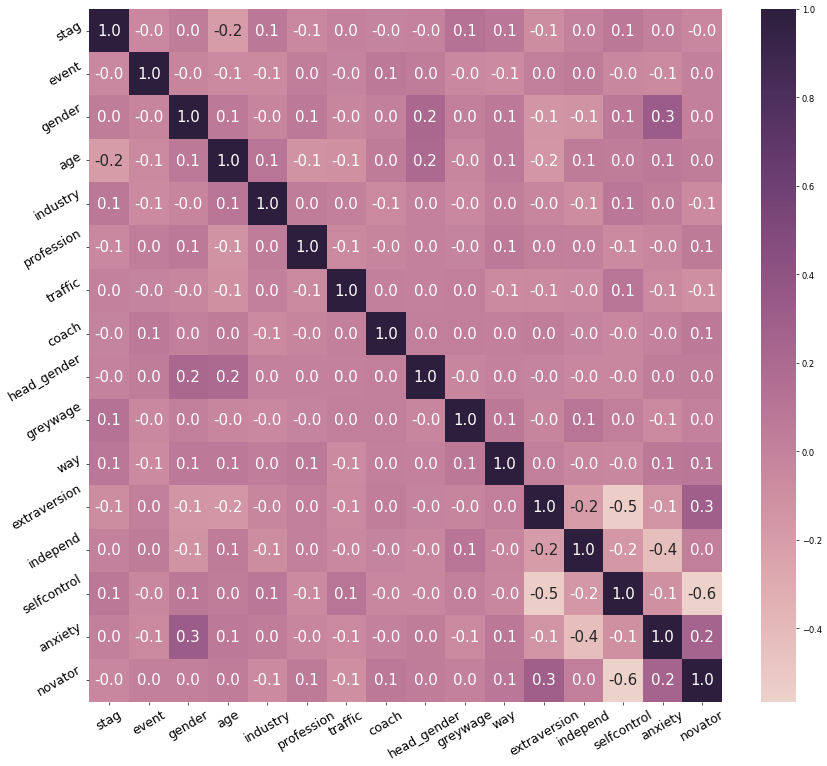

In [64]:
plt.figure(figsize=(17, 15),  dpi=60)
datalot = sb.heatmap(data.corr(method='pearson'), cmap=sb.cubehelix_palette(as_cmap=True),
                     annot=True, annot_kws={"fontsize":18}, fmt=".1f")
plt.xticks(fontsize=15, rotation=30)
plt.yticks(fontsize=15, rotation=30)
plt.show()

Результат показывает, что большинство значений <|0,6|. Следовательно избавляться от маленьких коэффициентов смысла нет, так как их больше половины всей матрицы корреляции



---



# ***Обучение модели***

 Разделим данные на обучающий и тестовый наборы. В данном случае процентное соотношение будет следующим: 30% данных для тестирования, 70% - для обучения

In [61]:
X = get_dum.drop(columns=["event"])
y = get_dum["event"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Обучим модель

In [62]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)



---



Построим ⭐ **confusion matrix** ⭐ для оценки производительности модели

*   строки представляют истинные классы, а столбцы - предсказанные классы

      [[TN FP]                                                    
      [FN TP]]  ☝

In [63]:
print(metrics.confusion_matrix(y_test, y_pred))

[[109  75]
 [ 44 107]]




---



In [65]:
print("Коэффициенты модели:")
print()
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"{feature}: {coef}")

Коэффициенты модели:

stag: -0.004331451000118865
age: -0.009332051535756234
extraversion: -0.06242822787858797
independ: 0.011628290959493399
selfcontrol: -0.027652097946547646
anxiety: -0.11231236502957286
novator: 0.03937585559958687
gender_0: 0.07839451131532747
gender_1: -0.0823824237422642
industry_0: 0.3472907856087907
industry_1: 0.4306953488836812
industry_2: 0.4959404632143466
industry_3: 0.7833797669873253
industry_4: 0.3587376450308674
industry_5: -1.0187358522427337
industry_6: 0.20860812347909657
industry_7: 0.01129702554551281
industry_8: -0.5178067434492364
industry_9: -0.12795546822710288
industry_10: -0.37030330951270457
industry_11: 0.05797370470720885
industry_12: -0.3693989218231088
industry_13: 0.16178826605850288
industry_14: -0.07158452929640732
industry_15: -0.3839142173900592
profession_0: 0.29213323378555484
profession_1: -0.08152371578382765
profession_2: 0.4316370591240063
profession_3: -0.3132446211882234
profession_4: 0.3287869994499192
profession_5: -0.2

**Положительные коэффициенты:**
- gender
- profession
- coach
- head_gender
- independ

(увеличение значений этих признаков положительно влияет на вероятность наступления события, которое модель пытается предсказать)

**Отрицательные коэффициенты:**
- stag
- age
- industry
- traffic
- greywage
- way
- extraversion
- selfcontrol
- anxiety

(увеличение значений этих признаков негативно влияет на вероятность наступления события)

**Незначительные коэффициенты:**
- novator: Коэффициент этого признака близок к нулю, что говорит о том, что этот признак имеет незначительное влияние на вероятность наступления события



---



Вычислим ⭐ **метрики** ⭐ для подведения итогов

In [68]:
conf_matrix = [[109, 75],
               [44, 107]]

precision = metrics.precision_score(y_test, y_pred) # Точность
recall = metrics.recall_score(y_test, y_pred)       # Полнота
f1_score = metrics.f1_score(y_test, y_pred)         # F1-мера
precision_class_1 = metrics.precision_score(y_test, y_pred, pos_label=1)
recall_class_1 = metrics.recall_score(y_test, y_pred, pos_label=1)
f1_score_class_1 = metrics.f1_score(y_test, y_pred, pos_label=1)
precision_class_0 = metrics.precision_score(y_test, y_pred, pos_label=0)
recall_class_0 = metrics.recall_score(y_test, y_pred, pos_label=0)
f1_score_class_0 = metrics.f1_score(y_test, y_pred, pos_label=0)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)
print("Precision for class 1:", precision_class_1)
print("Recall for class 1:", recall_class_1)
print("F1-score for class 1:", f1_score_class_1)
print("Precision for class 0:", precision_class_0)
print("Recall for class 0:", recall_class_0)
print("F1-score for class 0:", f1_score_class_0)

Precision: 0.5879120879120879
Recall: 0.7086092715231788
F1-score: 0.6426426426426426
Precision for class 1: 0.5879120879120879
Recall for class 1: 0.7086092715231788
F1-score for class 1: 0.6426426426426426
Precision for class 0: 0.7124183006535948
Recall for class 0: 0.592391304347826
F1-score for class 0: 0.6468842729970326


- Точность (Precision): Общая точность модели составляет примерно 58.7%. Это означает, что около 46.4% объектов, которые модель предсказала как положительные, действительно являются положительными.

- Полнота (Recall): Общая полнота модели составляет примерно 70.8%. Это означает, что модель правильно обнаруживает около 68.2% всех действительно положительных объектов.

- F1-мера (F1-score): Общая F1-мера составляет примерно 64.2%. F1-мера является сбалансированной мерой между точностью и полнотой.

---



- Точность (Precision) для класса 1: составляет примерно 71.2%.

- Полнота (Recall) для класса 1: составляет примерно 70.8%.

- F1-мера для класса 1: F1-мера для положительного класса также составляет примерно 64.2%.


---



- Точность (Precision) для класса 0: составляет примерно 57.5%.

- Полнота (Recall) для класса 0: составляет примерно 59.2%.

- F1-мера для отрицательного класса (0): составляет примерно 64.6%.


---



---



> *Модель показывает хорошую производительность в общем, с достаточно хорошими значениями точности и полноты.*                                                                               

> ***Таким образом, модель можно считать хорошо обученной.***